In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Summary Statistics

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observations :-
    
1. The mean is more than median for Age, DailyRate, DistanceFromHome, EmployeeNumber, JobLevel, TotalWorkingYears,
YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager columns.

# Exploring Target Variable

In [8]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

As target variable has only 2 values, so , this is a classification problem.

# Data Visualizations

To check missing values

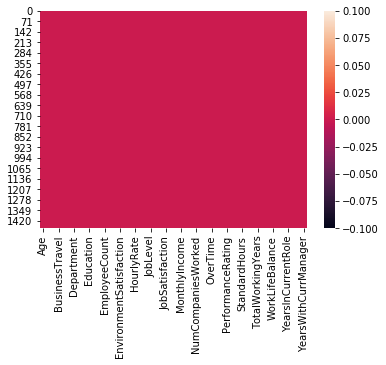

In [9]:
sns.heatmap(df.isnull())

Obsevations :-
    
1. The data has no missing values.

# Univariate Analysis

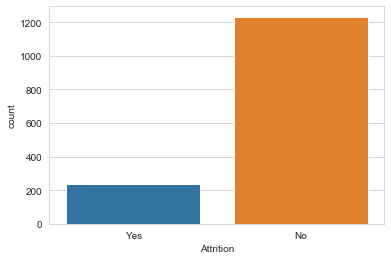

In [10]:
sns.set_style('whitegrid')
sns.countplot(df['Attrition'])

Observations :-
    
1. Low Attrition rate is present majorly in the dataset.

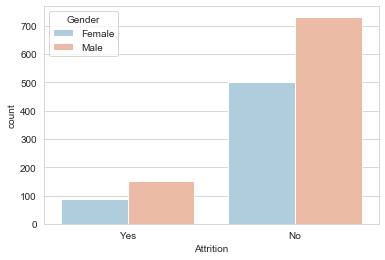

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Attrition',hue='Gender',data=df,palette='RdBu_r')

Observations:-
    
1. Males have low attrition than Females.

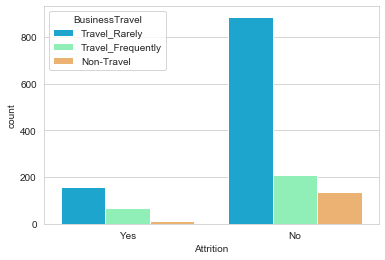

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Attrition',hue='BusinessTravel',data=df,palette='rainbow')

Observations:-
    
1. Employees who travel rarely have low attrition.

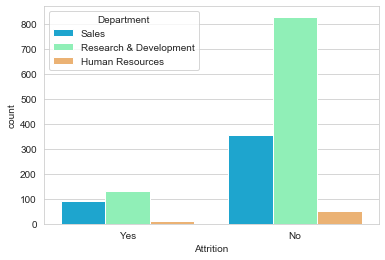

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Attrition',hue='Department',data=df,palette='rainbow')

Observations :-

1. Department of Research & Development have the lowest attrition.
2. Department of Human Resources have the highest attrition.

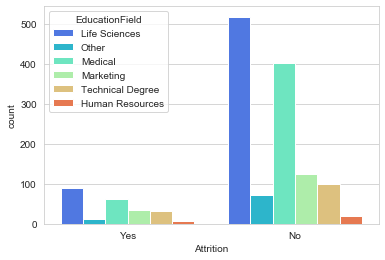

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Attrition',hue='EducationField',data=df,palette='rainbow')

Observations :-
    
1. Education Field of Life Sciences has the lowest attrition.
2. Education Field of Human Resources has the highest attrition.
3. Education Field of Medical also has low attrition.
4. Education Field of Marketing and Technical degree also have high attrition.

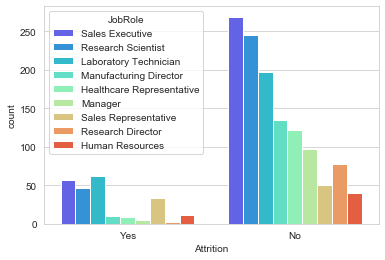

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Attrition',hue='JobRole',data=df,palette='rainbow')

Observations :-


1. Employees with Job Roble as Sales Executive have the lowest attrition. 
2. Employees with Job Roble as Human Resources have the highest attrition.
3. Research Scientist and Laboratory Technician also have low attrition.
4. Sales Representative and Research Director also have high attrition.

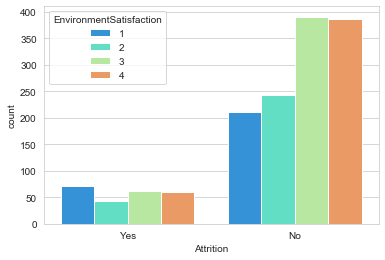

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Attrition',hue='EnvironmentSatisfaction',data=df,palette='rainbow')

Observations :-
    
1. Employees who have level 3 of environment satisfaction have the lowest attrition.
2. Employees who have level 1 of environment satisfaction have the highest attrition.
3. Employees who have level 4 of environment satisfaction also have low attrition.

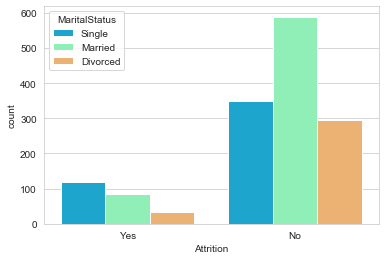

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Attrition',hue='MaritalStatus',data=df,palette='rainbow')

Observations :-
    
1. Married Employees have the lowest attrition.
3. Divorced Employees have the highest attrition.

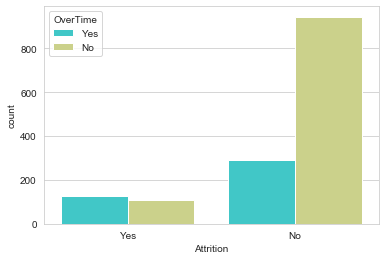

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Attrition',hue='OverTime',data=df,palette='rainbow')

Observations:-
    
1. Employees who have not done overtime have the lowest attrition.

# Bivariate Analysis

In [19]:
df_int_types=[]
for i in df.columns:
    if df[i].dtypes == "int64":
        df_int_types.append(i)

In [20]:
df_int_types

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [21]:
df_int_types_1=[
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

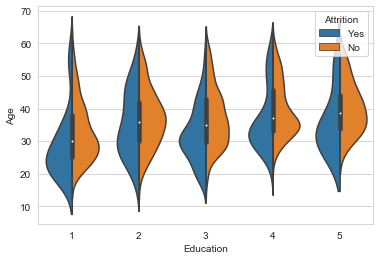

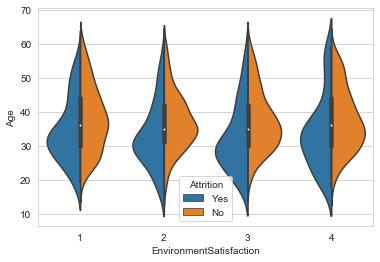

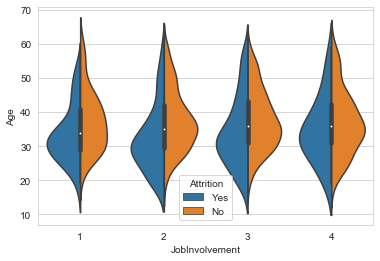

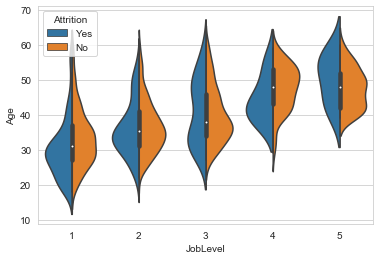

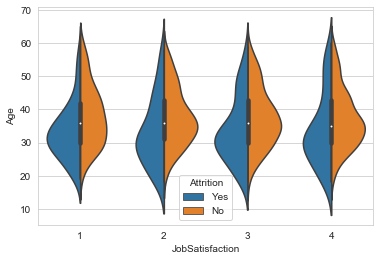

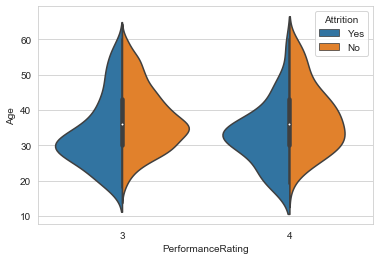

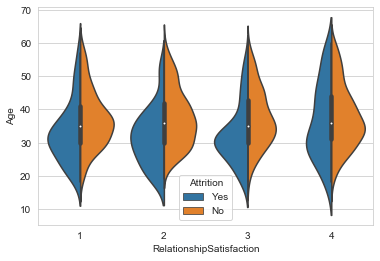

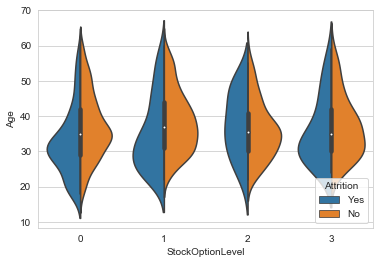

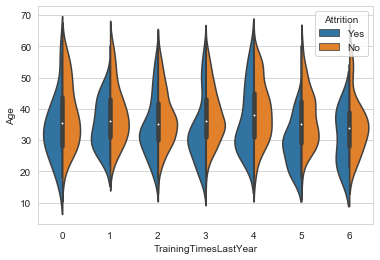

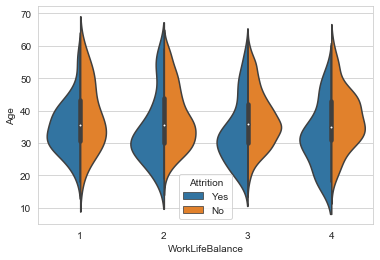

In [22]:
for i in df_int_types_1:
    sns.violinplot(x=i,y='Age',data=df,hue='Attrition',split=True)
    plt.show()

Observations :-
    
1. Employees with Education as 2 and 5 are less attrited than retained.
2. Employees with Education as 1, 3 and 4 are more attrited than retained.
3. Employees with Environment Satisfaction as 2, 3 and 4 are less attrited than retained.
4. Employees with Job Involvement as 2, 3 and 4 are less attrited than retained.
5. Employees with job level as 3, 4 and 5 are less attrited than retained.
6. Employees with Job Satisfaction as 2, 3 and 4 are less attrited than retained.
7. Employees with Performance Rating as 3 are less attrited than 4.
8. Employees with Relationship Satisfaction as 1 are less attrited .
9. Employees with Relationship Satisfaction as 3 and 4 are more attrited than retained.
10.Employees with Stock option level as 1 and 2 are less attrited than retained.
11. Employees with Training Time last year as 6 are less attrited than retained.
12. Employees with Work Life Satisfaction as 3 and 4 are less attrited than retained.

In [23]:
df_int_types_2=['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeCount',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'StandardHours',
 'TotalWorkingYears',
 'YearsAtCompany','YearsSinceLastPromotion',
 'YearsWithCurrManager','YearsInCurrentRole','NumCompaniesWorked',
 'PercentSalaryHike']

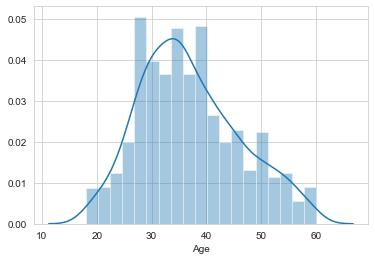

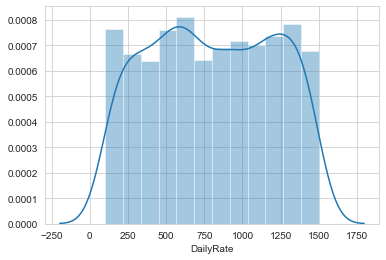

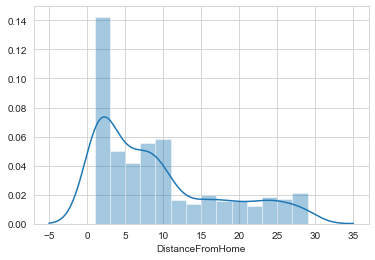

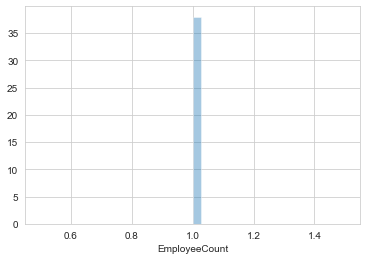

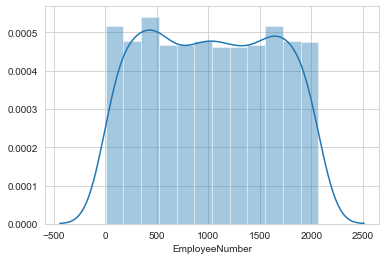

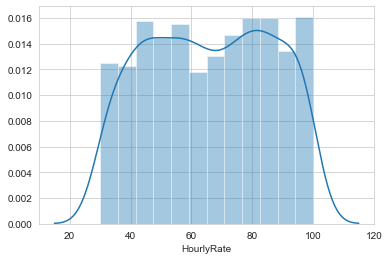

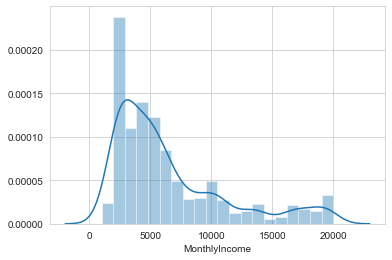

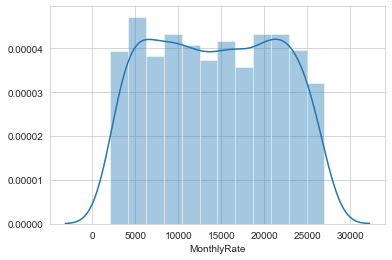

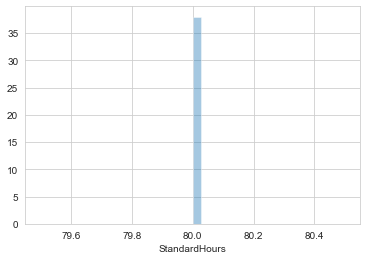

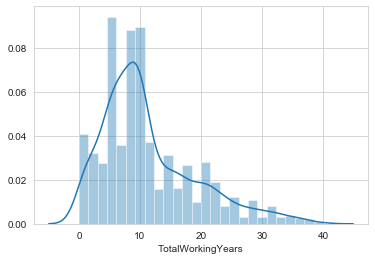

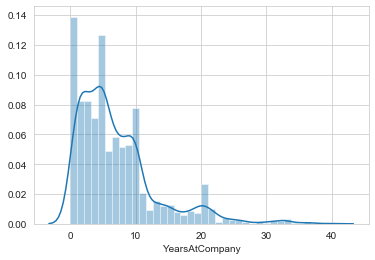

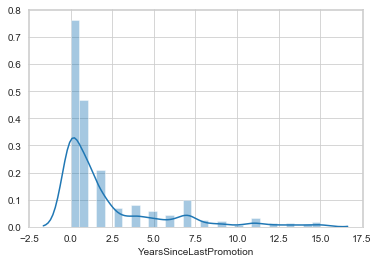

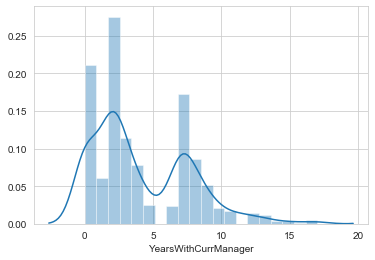

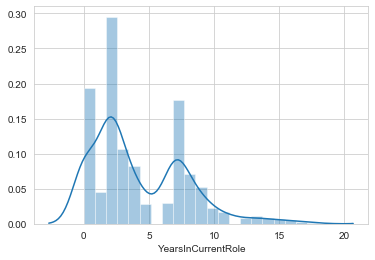

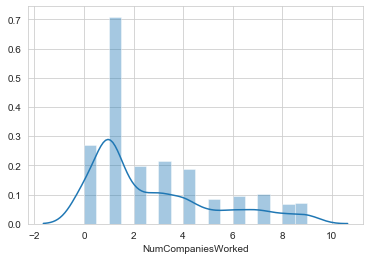

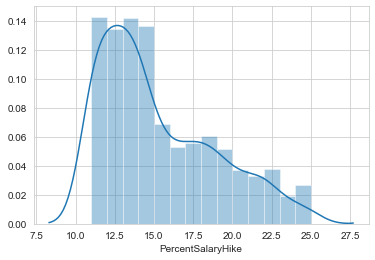

In [24]:
for i in df_int_types_2:
    sns.distplot(df[i])
    plt.show()

Observations :-

1. Employees with age in the range of 30 - 40 are less attrited than retained.
2. Employees with Daily Rate in the range of 250-1500 are less attrited than retained.
3. Employees with Distance from home in the range of 2-10 are less attrited than retained.
4. Companies with Employee Number in the range of 0-2000 are less attrited than retained.
5. Employees with Hourly Rate in the range of 30-100 are less attrited than retained.
6. Employees with Monthly Income less than 5000 are less attrited than retained.
7. Employees with Monthly Rate in the range of 5000 - 25000 are less attrited than retained.
8. Employees with Total Working Years in the range of 0 - 10 are less attrited than retained.
9. Employees with Years at Company in the range of 0 - 10 are less attrited than retained.
10. Employees with Years Since last Promotion less than 2.5 are less attrited than retained.
11. Employees with Years with Current manager in the range of 0-4 and 6-9 are less attrited than retained.
12. Employees with Years in Current Role in the range of 0-4 and 6-9 are less attrited than retained.
13. Employees who have worked in less than two companies are less attrited than retained.
14. Employees with percent salary hike in the range of 12 - 15 are less attrited than retained.

# Dropping of Columns

In [25]:
df.drop(['EmployeeCount','StandardHours'],axis=1,inplace=True)

# Label Encoding

In [26]:
df_str_types=[]
for i in df.columns:
    if df[i].dtypes == "object":
        df_str_types.append(i)

In [27]:
df_str_types

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [28]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for value in df_str_types:
    df[value]=LE.fit_transform(df[value])
    print(df[value].value_counts())
    

0    1233
1     237
Name: Attrition, dtype: int64
2    1043
1     277
0     150
Name: BusinessTravel, dtype: int64
1    961
2    446
0     63
Name: Department, dtype: int64
1    606
3    464
2    159
5    132
4     82
0     27
Name: EducationField, dtype: int64
1    882
0    588
Name: Gender, dtype: int64
7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: JobRole, dtype: int64
1    673
2    470
0    327
Name: MaritalStatus, dtype: int64
0    1470
Name: Over18, dtype: int64
0    1054
1     416
Name: OverTime, dtype: int64


In [29]:
# As the column of Over18 has only 1 type of value. So, This column is not useful for building the model and we will drop this.
df.drop(['Over18'],axis=1,inplace=True)

In [30]:
dfcorr=df.corr()
dfcorr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


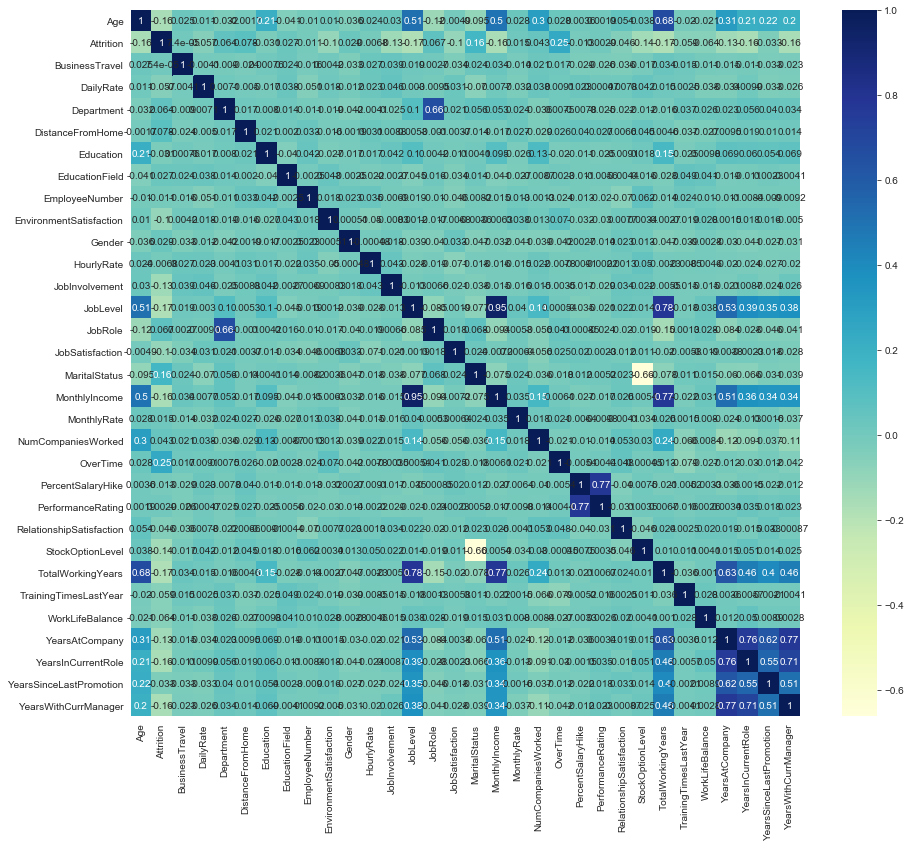

In [31]:
# Multivariate Analysis
plt.figure(figsize=(15,13))
sns.heatmap(dfcorr,cmap='YlGnBu',annot=True)

In [32]:
dfcorr["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

In [33]:
dfcorr["OverTime"].sort_values(ascending=True)

TrainingTimesLastYear      -0.079113
Gender                     -0.041924
YearsWithCurrManager       -0.041586
YearsInCurrentRole         -0.029758
WorkLifeBalance            -0.027092
EmployeeNumber             -0.024037
NumCompaniesWorked         -0.020786
Education                  -0.020322
MaritalStatus              -0.017521
YearsSinceLastPromotion    -0.012239
YearsAtCompany             -0.011687
HourlyRate                 -0.007782
PercentSalaryHike          -0.005433
JobInvolvement             -0.003507
StockOptionLevel           -0.000449
JobLevel                    0.000544
EducationField              0.002259
PerformanceRating           0.004369
MonthlyIncome               0.006089
Department                  0.007481
DailyRate                   0.009135
TotalWorkingYears           0.012754
BusinessTravel              0.016543
MonthlyRate                 0.021431
JobSatisfaction             0.024539
DistanceFromHome            0.025514
Age                         0.028062
J

In [34]:
dfcorr["TrainingTimesLastYear"].sort_values(ascending=False)

TrainingTimesLastYear       1.000000
EducationField              0.049195
Department                  0.036875
WorkLifeBalance             0.028072
EmployeeNumber              0.023603
BusinessTravel              0.015240
StockOptionLevel            0.011274
MaritalStatus               0.010629
YearsAtCompany              0.003569
RelationshipSatisfaction    0.002497
DailyRate                   0.002453
MonthlyRate                 0.001467
JobRole                     0.001342
YearsSinceLastPromotion    -0.002067
YearsWithCurrManager       -0.004096
PercentSalaryHike          -0.005221
YearsInCurrentRole         -0.005738
JobSatisfaction            -0.005779
HourlyRate                 -0.008548
JobInvolvement             -0.015338
PerformanceRating          -0.015579
JobLevel                   -0.018191
EnvironmentSatisfaction    -0.019359
Age                        -0.019621
MonthlyIncome              -0.021736
Education                  -0.025100
TotalWorkingYears          -0.035662
D

Observations :-
    
1. Attrition is highly positively correlated to OverTime.
2. OverTime is highly negatively correlated to TrainingTimesLastYear.
3. TrainingTimesLastYear is highly positively correlated to EducationField.
4. TrainingTimesLastYear is highly negatively correlated to Attrition.

# Plotting Outliers

In [35]:
df.shape

(1470, 32)

Age                             AxesSubplot(0.125,0.71587;0.0824468x0.16413)
Attrition                    AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
BusinessTravel               AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
DailyRate                    AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
Department                   AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
DistanceFromHome             AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
Education                    AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
EducationField               AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
EmployeeNumber                 AxesSubplot(0.125,0.518913;0.0824468x0.16413)
EnvironmentSatisfaction     AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
Gender                      AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
HourlyRate                  AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
JobInvolvement              AxesSubplot(0.520745,0.518913;0.0824468x0.16413)

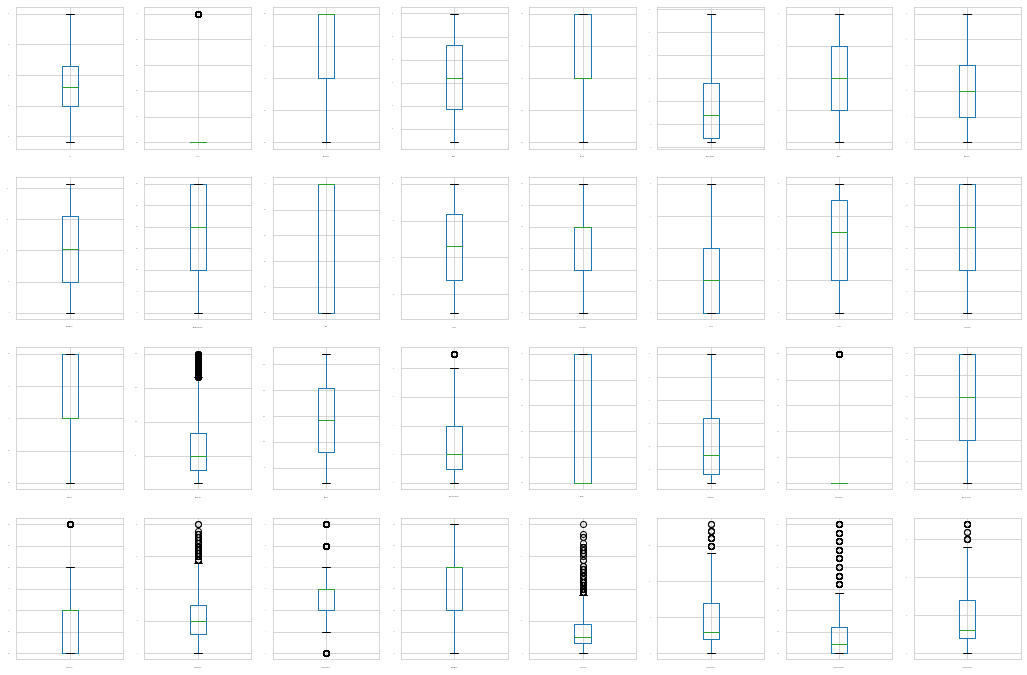

In [36]:
df.plot(kind='box',subplots=True,layout=(4,8),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. Attrition, MonthlyIncome, NumCompaniesWorked, PerformanceRating, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear,
, YearsAtCompany, 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager' have outliers.

# Removing Outliers

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [38]:
z

array([[0.4463504 , 2.28090588, 0.59004834, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.008343  , 2.28090588, 0.59004834, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [1.08667552, 0.4384223 , 0.59004834, ..., 0.61549158, 0.67914568,
        0.31487349],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.32016256, 0.4384223 , 0.59004834, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [39]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([31, 30, 28, 30, 29, 30, 25, 25, 28, 30, 29, 30, 31, 25, 28, 30, 31,
       30, 25, 31, 28, 29, 30, 29, 31, 28, 30, 25, 28, 29, 30, 30, 31, 25,
       28, 28, 30, 30, 25, 29, 28, 28, 30, 28, 31, 30, 28, 25, 28, 30, 31,
       25, 31, 28, 30, 

In [40]:
df_new=df[(z<3).all(axis=1)]

In [41]:
df_new.shape

(1387, 32)

In [42]:
df.shape

(1470, 32)

In [43]:
df=df_new

In [44]:
# 83 rows are removed as outliers.

In [45]:
((1470-1387)/1470)*100

5.646258503401361

# To check Skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000254DD398888>,
      dtype=object)

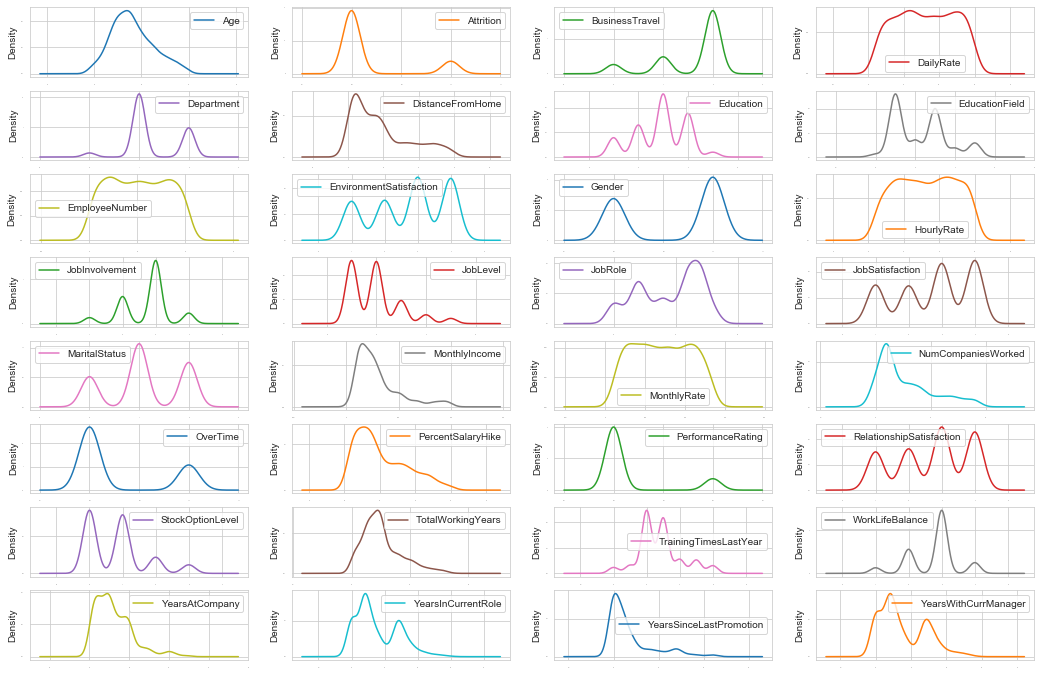

In [46]:
df.plot(kind='density',subplots=True,layout=(8,4),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. Attrition, DistanceFromHome, JobLevel, MonthlyIncome, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating,
StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole,YearsSinceLastPromotion, 
YearsWithCurrManager are right skewed.

2. BusinessTravel is left skewed.

In [47]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
W

In [48]:
df_rs=[ 'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [49]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.394018
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.649012
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.950248
MonthlyRate                 0.030596
NumCompaniesWorked          0.039150
OverTime                    0.954751
PercentSalaryHike           0.636544
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.063863
TotalWorkingYears           0.042345
TrainingTimesLastYear      -1.181432
W

In [50]:
df_rs=[ 'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',  'PercentSalaryHike',
       'PerformanceRating'
       ]
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.log(df[val])

In [51]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.394018
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.261201
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.318593
MonthlyRate                 0.030596
NumCompaniesWorked          0.039150
OverTime                    0.954751
PercentSalaryHike           0.477277
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.063863
TotalWorkingYears           0.042345
TrainingTimesLastYear      -1.181432
W

In [52]:
df_rs=['YearsSinceLastPromotion']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])


In [53]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.394018
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.261201
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.318593
MonthlyRate                 0.030596
NumCompaniesWorked          0.039150
OverTime                    0.954751
PercentSalaryHike           0.477277
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.063863
TotalWorkingYears           0.042345
TrainingTimesLastYear      -1.181432
W

# Train Test Split

In [54]:
x=df[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

y=df['Attrition']

In [55]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1.000000,2,1,1,2,0,...,0.549306,1,0.0,2.828427,0.000000,1,2.449490,2.000000,0.000000,2.236068
1,49,1,279,1,2.828427,1,1,2,3,1,...,0.693147,4,1.0,3.162278,1.732051,3,3.162278,2.645751,1.000000,2.645751
2,37,2,1373,1,1.414214,2,4,4,4,1,...,0.549306,2,0.0,2.645751,1.732051,3,0.000000,0.000000,0.000000,0.000000
3,33,1,1392,1,1.732051,4,1,5,4,0,...,0.549306,3,0.0,2.828427,1.732051,3,2.828427,2.645751,1.316074,0.000000
4,27,2,591,1,1.414214,1,3,7,1,1,...,0.549306,4,1.0,2.449490,1.732051,3,1.414214,1.414214,1.189207,1.414214


# Solution of Class Imbalance

In [56]:
import imblearn

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
SM=SMOTE()

In [59]:
x_over,y_over=SM.fit_resample(x,y)

In [60]:
y_over.value_counts()
y_over.head()
y=pd.DataFrame(y_over,columns=['Attrition'])
y.head()
x=pd.DataFrame(x_over,columns=['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'])

In [61]:
df=pd.concat((x,y),axis=1)


In [62]:
df.shape

(2316, 32)

In [63]:
df['Attrition'].value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

# Scaling of Data

In [64]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)

In [65]:
x

array([[ 0.71814737,  0.76304844,  0.84377247, ...,  0.49600872,
        -1.17212461,  0.76843507],
       [ 1.64830007, -0.76568874, -1.29475158, ...,  1.17778957,
         0.49211995,  1.1888523 ],
       [ 0.25307102,  0.76304844,  1.54795232, ..., -1.61558081,
        -1.17212461, -1.52621895],
       ...,
       [-0.79335078, -0.76568874, -1.1232539 , ...,  0.01213551,
         0.56347911, -0.04118899],
       [-0.09573625, -2.29442593,  0.75022828, ..., -0.79563397,
        -0.52588535, -0.96268069],
       [-0.32827442, -0.76568874, -0.49183064, ..., -0.31768243,
        -0.07647394,  0.48920784]])

In [66]:
x=pd.DataFrame(x)

In [67]:
x

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.718147,0.763048,0.843772,1.615720,-1.466090,-0.755233,-0.927549,-1.771582,-0.438393,-1.041445,...,-0.467776,-1.450850,-0.986739,0.014877,-3.641590,-2.149746,0.382207,0.496009,-1.172125,0.768435
1,1.648300,-0.765689,-1.294752,-0.345500,0.006032,-1.779308,-0.927549,-1.769839,0.485464,0.960204,...,2.491524,1.413743,0.763315,0.339565,0.342206,0.558338,1.165257,1.177790,0.492120,1.188852
2,0.253071,0.763048,1.547952,-0.345500,-1.132594,-0.755233,1.466437,-1.766352,1.409320,0.960204,...,-0.467776,-0.495985,-0.986739,-0.162785,0.342206,0.558338,-2.308738,-1.615581,-1.172125,-1.526219
3,-0.212005,-0.765689,1.597323,-0.345500,-0.876694,1.292917,-0.927549,-1.764609,1.409320,-1.041445,...,-0.467776,0.458879,-0.986739,0.014877,0.342206,0.558338,0.798498,1.177790,1.018144,-1.526219
4,-0.909620,0.763048,-0.484035,-0.345500,-1.132594,-1.779308,0.668441,-1.761122,-1.362250,0.960204,...,-0.467776,1.413743,0.763315,-0.353660,0.342206,0.558338,-0.755120,-0.122462,0.807007,-0.074952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,-0.444544,0.763048,-0.148835,-2.306719,1.255973,0.268842,-0.927549,0.726683,-1.362250,0.960204,...,1.177661,-0.495985,0.359039,-0.663156,-1.872874,0.558338,-0.755120,-0.122462,0.807007,-0.719282
2312,0.485609,0.763048,0.142191,1.615720,0.506132,-0.755233,-0.129554,0.946349,-1.362250,0.960204,...,-0.467776,0.458879,0.848025,-0.032844,-0.388834,-0.795704,-0.353251,0.213870,0.995288,0.251952
2313,-0.793351,-0.765689,-1.123254,-0.345500,-1.000428,0.268842,-0.927549,0.133933,-1.362250,0.960204,...,-0.467776,-1.450850,0.763315,-0.067540,-0.487455,0.558338,-0.302046,0.012136,0.563479,-0.041189
2314,-0.095736,-2.294426,0.750228,-0.345500,-0.285700,-1.779308,-0.927549,0.656947,-0.438393,0.960204,...,-0.467776,-1.450850,0.083755,-0.561224,-0.388834,-2.149746,-0.682876,-0.795634,-0.525885,-0.962681


In [68]:
x.columns=['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [69]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.718147,0.763048,0.843772,1.61572,-1.466090,-0.755233,-0.927549,-1.771582,-0.438393,-1.041445,...,-0.467776,-1.450850,-0.986739,0.014877,-3.641590,-2.149746,0.382207,0.496009,-1.172125,0.768435
1,1.648300,-0.765689,-1.294752,-0.34550,0.006032,-1.779308,-0.927549,-1.769839,0.485464,0.960204,...,2.491524,1.413743,0.763315,0.339565,0.342206,0.558338,1.165257,1.177790,0.492120,1.188852
2,0.253071,0.763048,1.547952,-0.34550,-1.132594,-0.755233,1.466437,-1.766352,1.409320,0.960204,...,-0.467776,-0.495985,-0.986739,-0.162785,0.342206,0.558338,-2.308738,-1.615581,-1.172125,-1.526219
3,-0.212005,-0.765689,1.597323,-0.34550,-0.876694,1.292917,-0.927549,-1.764609,1.409320,-1.041445,...,-0.467776,0.458879,-0.986739,0.014877,0.342206,0.558338,0.798498,1.177790,1.018144,-1.526219
4,-0.909620,0.763048,-0.484035,-0.34550,-1.132594,-1.779308,0.668441,-1.761122,-1.362250,0.960204,...,-0.467776,1.413743,0.763315,-0.353660,0.342206,0.558338,-0.755120,-0.122462,0.807007,-0.074952


In [70]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    print('Accuracy score of Logistic Regression','is:')
    accu_score=accuracy_score(y_test,pred)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    if accu_score>maxAccu:
        maxAccu=accu_score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Accuracy score of Logistic Regression is:
0.8509803921568627
[[227  37]
 [ 39 207]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       264
           1       0.85      0.84      0.84       246

    accuracy                           0.85       510
   macro avg       0.85      0.85      0.85       510
weighted avg       0.85      0.85      0.85       510

Accuracy score of Logistic Regression is:
0.8549019607843137
[[223  39]
 [ 35 213]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       262
           1       0.85      0.86      0.85       248

    accuracy                           0.85       510
   macro avg       0.85      0.86      0.85       510
weighted avg       0.86      0.85      0.85       510

Accuracy score of Logistic Regression is:
0.8372549019607843
[[220  46]
 [ 37 207]]
              precision    recall  f1-score   support

           0       0.86      0.83      

# Algorithms

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=181)
lm=LogisticRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print('Accuracy score of Logistic Regression','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of Logistic Regression is:
0.8764705882352941
[[221  40]
 [ 23 226]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       261
           1       0.85      0.91      0.88       249

    accuracy                           0.88       510
   macro avg       0.88      0.88      0.88       510
weighted avg       0.88      0.88      0.88       510



In [72]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score of DecisionTreeClassifier','is:')
accu_score=accuracy_score(y_test,preddtc)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy score of DecisionTreeClassifier is:
0.8509803921568627
[[215  46]
 [ 30 219]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       261
           1       0.83      0.88      0.85       249

    accuracy                           0.85       510
   macro avg       0.85      0.85      0.85       510
weighted avg       0.85      0.85      0.85       510



In [73]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score of knn','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of knn is:
0.8764705882352941
[[221  40]
 [ 23 226]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       261
           1       0.85      0.91      0.88       249

    accuracy                           0.88       510
   macro avg       0.88      0.88      0.88       510
weighted avg       0.88      0.88      0.88       510



In [80]:
svm=SVC()
svm.fit(x_train,y_train)
predsvc=svm.predict(x_test)
print('Accuracy score of svm','is:')
accu_score=accuracy_score(y_test,predsvc)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy score of svm is:
0.9392156862745098
[[243  18]
 [ 13 236]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       261
           1       0.93      0.95      0.94       249

    accuracy                           0.94       510
   macro avg       0.94      0.94      0.94       510
weighted avg       0.94      0.94      0.94       510



In [75]:
bnb=GaussianNB()
bnb.fit(x_train,y_train)
predbnb=bnb.predict(x_test)
print('Accuracy score of BinomialNB','is:')
accu_score=accuracy_score(y_test,predbnb)
print(accuracy_score(y_test,predbnb))
print(confusion_matrix(y_test,predbnb))
print(classification_report(y_test,predbnb))

Accuracy score of BinomialNB is:
0.8137254901960784
[[207  54]
 [ 41 208]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       261
           1       0.79      0.84      0.81       249

    accuracy                           0.81       510
   macro avg       0.81      0.81      0.81       510
weighted avg       0.81      0.81      0.81       510



In [76]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy score of RandomForestClassifier','is:')
accu_score=accuracy_score(y_test,predrf)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score of RandomForestClassifier is:
0.9431372549019608
[[254   7]
 [ 22 227]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       261
           1       0.97      0.91      0.94       249

    accuracy                           0.94       510
   macro avg       0.95      0.94      0.94       510
weighted avg       0.94      0.94      0.94       510



In [77]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy score of AdaBoostClassifier','is:')
accu_score=accuracy_score(y_test,predad)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

Accuracy score of AdaBoostClassifier is:
0.9294117647058824
[[236  25]
 [ 11 238]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       261
           1       0.90      0.96      0.93       249

    accuracy                           0.93       510
   macro avg       0.93      0.93      0.93       510
weighted avg       0.93      0.93      0.93       510



Random Forest Classifier is the best algorithm.

# Cross - Validation Scores

In [78]:
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.66810345 0.97408207 0.95680346 0.96760259 0.55507559]
0.8243334326357339 0.17742976419352116


In [83]:
list1=[0.9431372549019608]
list2=[0.8243334326357339]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)

[0.11880382226622688]


As the difference between accuracy scores and cross validation scores of Random Forest Classifier is only 1%. So, It is verified that Random Forest Classifier is the best algorithm for this model with accuracy of 94.313 % .

# Hyper Parameter Tuning

In [94]:
rf=RandomForestClassifier()
grid_param={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'n_estimators':[25,50,75,100],'max_depth':[None,int]}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, <class 'int'>],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [25, 50, 75, 100]},
             scoring='accuracy')

In [95]:
gd_sr.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 75}

In [97]:
rf=RandomForestClassifier(criterion= 'gini',
 max_depth=None,
 max_features= 'sqrt',
 n_estimators= 100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy score of RandomForestClassifier','is:')
accu_score=accuracy_score(y_test,predrf)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score of RandomForestClassifier is:
0.9470588235294117
[[254   7]
 [ 20 229]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       261
           1       0.97      0.92      0.94       249

    accuracy                           0.95       510
   macro avg       0.95      0.95      0.95       510
weighted avg       0.95      0.95      0.95       510



Accuracy of Random Forest Classifier has changed from 94.313 %  to 94.705 % with hyper parameter tuning.

# AOC - ROC Curve

In [98]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [99]:
y_pred_prob=rf.predict_proba(x_test)[:,1]

In [100]:
y_pred_prob

array([0.82, 0.8 , 0.06, 0.97, 0.19, 0.19, 0.15, 0.56, 0.15, 0.64, 0.19,
       0.1 , 0.48, 0.11, 0.14, 0.24, 0.32, 0.41, 0.11, 0.15, 0.15, 0.32,
       0.96, 0.67, 0.14, 0.13, 0.19, 0.79, 0.19, 0.8 , 0.32, 0.3 , 0.05,
       0.99, 0.27, 0.41, 0.6 , 0.99, 0.93, 0.91, 0.26, 0.95, 0.16, 0.16,
       1.  , 0.13, 0.86, 0.3 , 0.21, 0.08, 0.49, 0.11, 0.88, 0.92, 0.34,
       0.55, 0.2 , 0.87, 0.29, 0.78, 0.92, 0.98, 0.44, 0.92, 0.79, 0.71,
       0.13, 0.28, 0.3 , 0.16, 0.55, 0.9 , 0.99, 0.77, 0.55, 0.95, 0.35,
       0.26, 0.2 , 1.  , 0.74, 0.87, 0.37, 0.51, 0.68, 0.2 , 0.87, 0.19,
       0.17, 0.2 , 0.38, 0.1 , 0.65, 0.16, 0.59, 0.69, 0.94, 0.91, 0.9 ,
       0.09, 1.  , 0.91, 0.95, 0.86, 0.25, 0.82, 0.89, 0.99, 0.35, 0.17,
       0.18, 0.13, 0.56, 0.82, 0.71, 0.5 , 0.41, 0.19, 1.  , 0.15, 0.1 ,
       0.25, 0.64, 0.82, 0.11, 0.99, 0.86, 0.91, 0.25, 0.18, 0.3 , 0.84,
       0.38, 0.14, 0.08, 0.69, 0.61, 0.9 , 0.66, 0.8 , 0.93, 0.31, 0.72,
       0.07, 0.25, 0.98, 0.14, 0.36, 0.99, 0.85, 0.

In [101]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [102]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00383142,
       0.00383142, 0.00766284, 0.00766284, 0.00766284, 0.01149425,
       0.01915709, 0.02681992, 0.02681992, 0.02681992, 0.03448276,
       0.04597701, 0.04980843, 0.04980843, 0.05747126, 0.0651341 ,
       0.07279693, 0.09578544, 0.11111111, 0.12643678, 0.13409962,
       0.13793103, 0.14942529, 0.15708812, 0.17241379, 0.19157088,
       0.22605364, 0.26436782, 0.27586207, 0.32183908, 0.33716475,
       0.35632184, 0.35632184, 0.38697318, 0.42528736, 0.48659004,
       0.51724138, 0.55555556, 0.59770115, 0.62835249, 0.73563

In [103]:
tpr

array([0.        , 0.03614458, 0.09236948, 0.11646586, 0.15662651,
       0.21686747, 0.27309237, 0.31726908, 0.35341365, 0.39759036,
       0.44578313, 0.46987952, 0.49799197, 0.51807229, 0.54618474,
       0.58634538, 0.59839357, 0.61445783, 0.62650602, 0.65461847,
       0.67068273, 0.69076305, 0.70682731, 0.7188755 , 0.73493976,
       0.73895582, 0.75903614, 0.76305221, 0.79518072, 0.80722892,
       0.81124498, 0.82329317, 0.83935743, 0.85542169, 0.85542169,
       0.85943775, 0.87148594, 0.88353414, 0.89156627, 0.89959839,
       0.90361446, 0.90361446, 0.90763052, 0.91967871, 0.91967871,
       0.92771084, 0.92771084, 0.93172691, 0.93172691, 0.93975904,
       0.93975904, 0.9437751 , 0.9437751 , 0.95983936, 0.95983936,
       0.96385542, 0.96787149, 0.96787149, 0.97188755, 0.97590361,
       0.97991968, 0.97991968, 0.97991968, 0.97991968, 0.98393574,
       0.98393574, 0.98795181, 0.98795181, 0.98795181, 0.99196787,
       0.99196787, 0.99196787, 0.99196787, 0.99196787, 0.99196

In [104]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 ,
       0.79, 0.78, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.65,
       0.64, 0.63, 0.62, 0.61, 0.6 , 0.58, 0.56, 0.55, 0.54, 0.53, 0.51,
       0.5 , 0.49, 0.48, 0.47, 0.45, 0.44, 0.42, 0.41, 0.39, 0.38, 0.37,
       0.36, 0.35, 0.34, 0.32, 0.31, 0.3 , 0.28, 0.27, 0.25, 0.24, 0.23,
       0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.13, 0.12, 0.11,
       0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03])

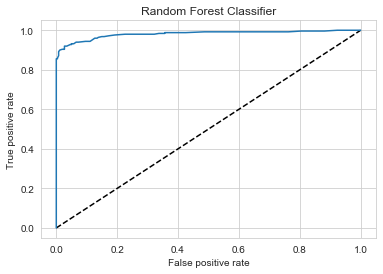

In [105]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

Observations :-

1. As the line is moving towards 1, so we can conclude that we have developed good model.

# Saving the model

In [106]:
import joblib

In [107]:
joblib.dump(rf,"rf_hr_analytics.obj")

['rf_hr_analytics.obj']